# <center><font color = blue>Problem Set 4: Okawville Aquifer Test</font></center>

<ul>
    <li>Assignment Due February 27th</li>
</ul>




In class, we conducted an aquifer test for the Village of Okawville. In this assignment, you will repeat this analysis, but instead of using Jacob Straight Line, you will fit the data from the aquifer test directly to the Theis Solution. 

<ul>
    <li>All values reported should be rounded to three significant figures. There are ways to automate code to do this for you, but you may use the round() function with arguments hard-coded specifically for the output you are displaying.</li>
    <li>All plots should include an appropriate title and labels on the x- and y- axes.</li>
    <li>Observed data (what you import from Excel) should be plotted as points; best fit lines should be plotted as continuous lines.</li>
</ul>

## Part I: Write a code to plot the entire data set

Both the x- and y-axis should be plotted on a linear scale (time on the x-axis, drawdown on the y-axis).

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as spo
import scipy.special as sps
%matplotlib inline

      dtw
0    0.00
1    0.02
2    0.04
3    0.07
4    0.08
5    0.10
6    0.13
7    0.16
8    0.19
9    0.22
10   0.24
12   0.27
15   0.30
20   0.37
25   0.43
30   0.46
40   0.51
50   0.56
60   0.59
70   0.61
80   0.62
90   0.63
100  0.64
120  0.65


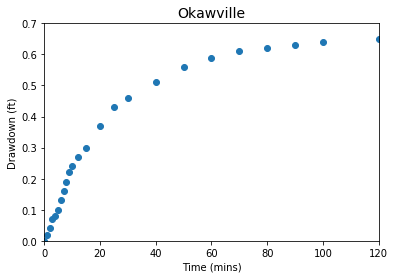

In [71]:
df_dd = pd.read_excel('https://github.com/yiquanw2/geol572_4/blob/master/Okawville_MW_AquiferTest.xlsx?raw=true', index_col=0)
print(df_dd)
df_dd.dtw.plot(style='o')
plt.xlabel('Time (mins)')
plt.ylabel('Drawdown (ft)')
plt.ylim(0,0.7)
plt.title('Okawville',fontsize=14)
plt.show()

## Part II: Theis Curve Fitting

The Jacob Straight Line method is based on an approximation of the Theis solution. However, there is another option available when using Python, fitting the Theis solution directly to the data, with S and T as the unknown parameters. 

<b>Include:</b>
<ul>
    <li>A Markdown Cell with the Theis Equation written in LaTeX.</li>
    <li>A plot with the time axis on a logarithmic scale.</li>
    <li>Values for S and T, including appropriate units.</li>
</ul>
    
<b>Tips:</b>    
<ul>
    <li>To get this code to work, you will need to use very small convergence criteria. Don't hesitate to work in the 10^-6-10^-12 range.</li>
    <li>When fitting to the Theis Curve, you may use a subset of data. See the class lecture notes for inspiration on how to do this.</li>
    <li>The answer should be similar to the Jacob Straight Line solution from class (although not exactly the same).</li>
</ul>

**<font size = 4>Theis equation**

Non-equilibrium radial flow in a confined aquifer:

<font size = 5>$s=\frac{Q}{4\pi T}W(u)$

<font size = 5>$u=\frac{r^2S}{4Tt}$

where:

$T$ = Transmissivity ($L^2/T$)

$S$ = Storativity (unitless)

$s$ = drawdown =$h_0 – h$ ($L$)

$Q$ = Pumping rate ($L^3/T$)

$r$ = radial distance of observation well ($L$)

$t$ = elapsed time since pumping began or ended ($T$)

$W(u)$ = well function


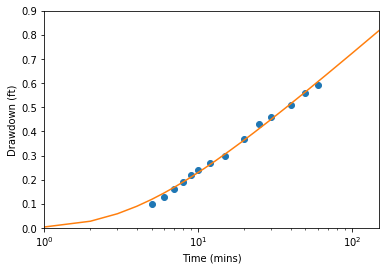

The Theis curve fitting Method indicates that T is 2570.0 ft^2/day and S is 0.0221 .


In [84]:
dd=df_dd['dtw'][5:-5]
def theis_line(x,S,T):
  r=30  #ft
  Q=5.35  #ft^3/min
  u=r**2*S/(4*T*x)
  return Q/(4*np.pi*T)*sps.exp1(u)

para, cova = spo.curve_fit(theis_line,dd.index, dd)

xx=np.arange(1,151)
S=para[0]
T=para[1]
yy=theis_line(xx,S,T)

plt.semilogx(dd,'o',xx,yy)
plt.xlabel('Time (mins)')
plt.ylabel('Drawdown (ft)')
plt.xlim(1,150)
plt.ylim(0,0.9)
plt.show()
print('The Theis curve fitting Method indicates that T is',\
      round(T*60*24,-1),'ft^2/day and S is',round(S,4),'.')

## Part III: Contamination Analysis

The village would like to know how long it would take for the contamination to reach a well at the new site pumping at a rate Q of 40.1 $ft^3/min$ (300 gpm). Assuming the initial pre-pumping water table configuration is a flat level surface, the groundwater flow gradient from the brine contamination zone towards the well will be a function of the drawdown created by the well. Calculate the drawdown at 1 ft intervals from the well to the edge of the brine zone (starting at r = 1' and ending at r = 5200').  Approximate the travel time by calculating the linear groundwater velocity (v) for each of the segments. Porosity is 20%.

To calculate the drawdown ($s$ or $\Delta(h_0-h)$) at the given radial distances from the well, use the Theis solution. For time (t) use 180 days (259200 mins), which is the typical length of the groundwater discharge season in Illinois. For this problem, ignore the effects of the different boundary conditions.

<b>Include:</b>
<ul>
    <li>The travel time to 3 significant figures.</li>
    <li>A plot with the primary axis showing drawdown and the secondary axis showing velocity.</li>
</ul>

Click on the following links to find two useful images that you <b>may</b> need for this analysis:

[Well log for supply well 4](https://share.cocalc.com/share/84a5dae3-8e5c-4c85-bbd4-1d36447235d6/assignments/Prob%20Set%203/Okawville%20Well%20Log.png?viewer=share)

[High-resolution map of this area showing the contamination plumes](https://cocalc.com/share/84a5dae3-8e5c-4c85-bbd4-1d36447235d6/assignments/Prob%20Set%203/BrineContaminationMap.png?viewer=share)

<b>Answer from hand analysis:</b> travel time was ~35 years. Your response should be somewhere between 30-40 years.

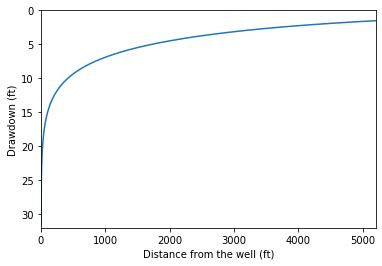

In [90]:
def drawdown(r):
  Q=40.1  #ft^3/min
  t=259200 #mins
  u=r**2*S/(4*T*259200)
  return Q/(4*np.pi*T)*sps.exp1(u)
r=np.arange(1,5201)
s=drawdown(r)
plt.plot(r,s)
plt.xlabel('Distance from the well (ft)')
plt.ylabel('Drawdown (ft)')
plt.xlim(0,5200)
plt.ylim(0,32)
plt.gca().invert_yaxis()
plt.show()

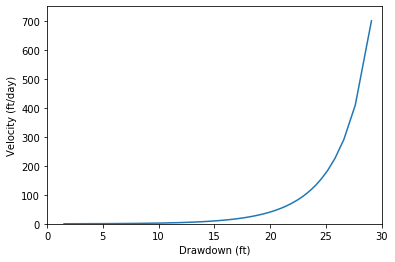

The travel time is 43.3 years.


In [122]:
b=45.5 #thickness:ft
K=T*60*24/b #hydraulic conductivity: ft/day
s_shift=s[1:]
delta_s=[s[i] - s_shift[i] for i in range(len(s_shift))]
q=K*np.array(delta_s) #specific discharge: ft/day
n=0.2 #porosity
v=q/n #velocity: ft/day
plt.plot(s_shift,v)
plt.xlabel('Drawdown (ft)')
plt.ylabel('Velocity (ft/day)')
plt.xlim(0,30)
plt.ylim(0,750)
plt.show()
t=1/v/365 #time: year
total_t=sum(t)
print('The travel time is',round(total_t,1),'years.')

## Part IV: Conclusions

Would you recommend constructing a production well at the new site if the financing for the wells and the pipelines require a 40 year life cycle? Use the above analyses to justify your response. Be sure to comment on any uncertainty in your analysis. Limit this discussion to 1 paragraph.